In [1]:
import torch
import numpy as np
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load extracted features (assumed to be only abstract images)
features = torch.load("output/abstract_features.pt")
features_np = features.numpy()


/tmp/ipykernel_330124/2123164726.py:8: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  features = torch.load("output/abstract_features.pt")


In [2]:
# -------------------------------
# CLUSTERING USING KMEANS
# -------------------------------
n_clusters = 5  # First try we'll change later
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(features_np)

# -------------------------------
# t-SNE FOR VISUALIZATION
# -------------------------------
print("Running t-SNE...")
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
features_2d = tsne.fit_transform(features_np)


Running t-SNE...


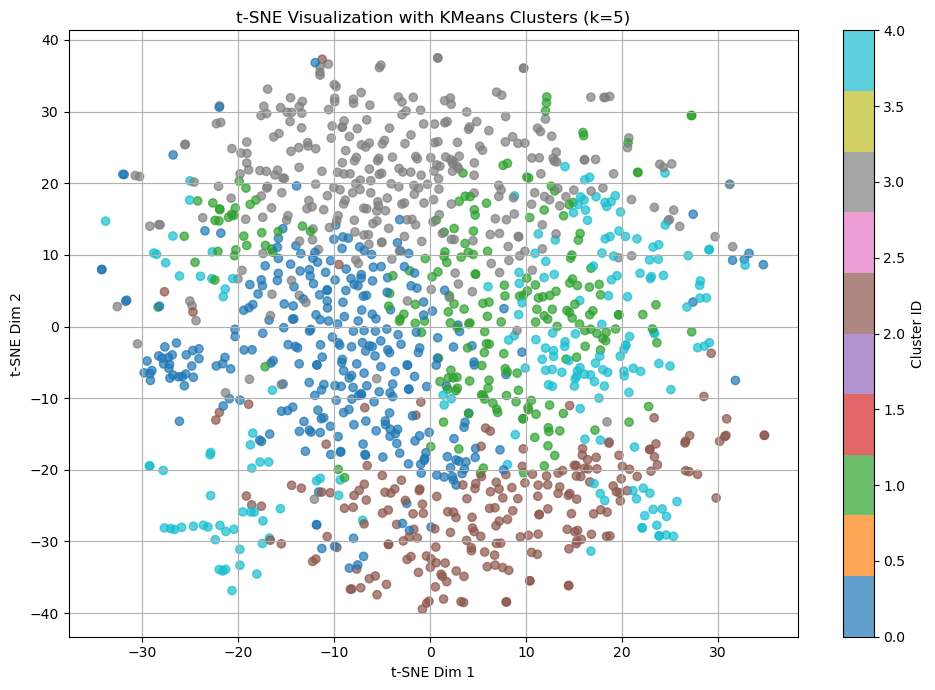

In [3]:
# -------------------------------
# PLOT RESULTS
# -------------------------------
plt.figure(figsize=(10, 7))
scatter = plt.scatter(features_2d[:, 0], features_2d[:, 1], c=clusters, cmap='tab10', alpha=0.7)
plt.title(f"t-SNE Visualization with KMeans Clusters (k={n_clusters})")
plt.colorbar(scatter, label="Cluster ID")
plt.xlabel("t-SNE Dim 1")
plt.ylabel("t-SNE Dim 2")
plt.grid(True)
plt.tight_layout()
plt.show()